In [1]:
import pandas as pd
import numpy as np

customer_csv = "../datasets/customer_details_noquotes.csv"
customers = pd.read_csv(customer_csv, usecols=['name', 'state', 'phone'])
customers = customers[~customers.name.isnull()].reset_index(drop=True)

customers[0:5]


,name,phone,state
0,Grant Rachel,(415) 382-4657,Kansas
1,Paterson Joshua,(415) 371-7191,Ohio
2,Dickens Lillian,(415) 358-1921,New Jersey
3,Wright Lucas,(408) 375-9999,Ohio
4,MacDonald Warren,415 330-6626,Oklahoma


In [2]:

usages = pd.read_csv('../datasets/usage_details.csv', usecols=['phone', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge'])
usages['total_intl_calls'] = usages.total_intl_calls.astype(int)
usages.describe()
#usages.head()



,total_intl_minutes,total_intl_calls,total_intl_charge
count,3333.000000,3333.000000,3333.000000
mean,10.237294,4.479448,2.764581
std,2.791840,2.461214,0.753773
min,0.000000,0.000000,0.000000
25%,8.500000,3.000000,2.300000
50%,10.300000,4.000000,2.780000
75%,12.100000,6.000000,3.270000
max,20.000000,20.000000,5.400000


In [3]:
custo_usages = customers.merge(usages, on=['phone'], how='outer', sort='True')
custo_usages[400:403]

,name,phone,state,total_intl_minutes,total_intl_calls,total_intl_charge
400,Mathis Liam,(408) 371-4633,Indiana,14.7,8.0,3.97
401,Taylor Oliver,(408) 371-4788,Colorado,10.9,6.0,2.94
402,Hodges Madeleine,(408) 371-5655,Minnesota,12.4,2.0,3.35


In [4]:
custo_states = customers.drop('name', 1).groupby('state').agg('count').reset_index()
custo_states.columns = ['state','customer_count']

custo_states[:5]

,state,customer_count
0,Alabama,80
1,Alaska,51
2,Arizona,64
3,Arkansas,54
4,California,33


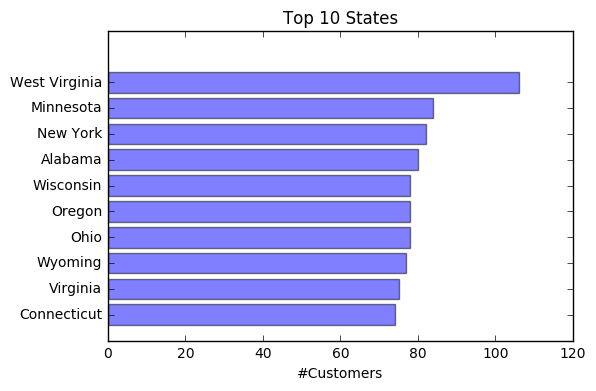

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = custo_states.sort_values('customer_count', ascending=False)[:10]

#plt.rcdefaults()
fig, ax = plt.subplots()

states = tuple(data['state'].tolist())
y_pos = np.arange(len(states))
performance = data['customer_count']
error = np.random.rand(len(states))

ax.barh(y_pos, performance, align='center', alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(states)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('#Customers')
ax.set_title('Top 10 States')

plt.show()